In [1]:
import pandas as pd
import numpy as np
import warnings

In [6]:
%pip install seaborn

In [23]:
%pip install plotly
%pip install cufflinks

<class 'ValueError'>: Can't find a pure Python 3 wheel for 'cufflinks'.
See: https://pyodide.org/en/stable/usage/faq.html#why-can-t-micropip-find-a-pure-python-wheel-for-a-package
You can use `await micropip.install(..., keep_going=True)` to get a list of all packages with missing wheels.

In [28]:
%pip install plotly 
import plotly 

In [32]:
python -m pip install --upgrade pip

<class 'SyntaxError'>: invalid syntax (<ipython-input-32-d3931c782b5a>, line 1)

In [21]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# Feature Scaling
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,PowerTransformer
from sklearn.compose import ColumnTransformer

In [8]:
# Model Building & Model Traning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [9]:
# Feature Selection
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [10]:
# Model Evaluation:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
## Section :2 Loading and Data Understanding

In [12]:
df  = pd.read_csv('day.csv')

In [13]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [14]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [15]:
# checking the shape of dataframe
print(f'Rows::{df.shape[0]}')
print(f'Columns::{df.shape[1]}')

Rows::730
Columns::16


In [16]:
# describing the columns of dataframe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# Section : 3 Data Cleaning and Formatting

In [ ]:
# Handling Missing Values
# Identifying and addressing empty cells, represented as "NaN" in numerical data or blanks in spreadsheets.

In [ ]:
# Managing Duplicates
# Detecting and resolving duplicate rows or entries.

In [ ]:
# Dropping Unnecessary Columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.

In [ ]:
# Mapping Feature Numerical Columns to Categorical Columns
# Convert the numerical values in the 'season' column to categorical string values representing the seasons (e.g., 1 to 'Spring', 2 to 'Summer', etc.).
# Convert the numerical values in the 'weathersit' column to categorical string values representing different weather conditions (e.g., 1 to 'Clear', 2 to 'Cloudy', etc.).
# Define a mapping dictionary to convert numerical representations of months into their corresponding names (e.g., 1 to 'January', 2 to 'February', etc.).
# Define a mapping dictionary to convert numerical representations of days into their respective names (e.g., 0 to 'Monday', 1 to 'Tuesday', etc.).

In [17]:
# checking for the null values in column data
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [36]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [37]:
# dropping the unwanted columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.
df.drop(columns=['instant','dteday','casual','registered'],inplace=True,axis=1)

In [38]:
# Convert 'season' values to categorical string values
season_mapping = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
df['season'] = df['season'].map(season_mapping)

In [39]:
# Convert 'weathersit' values to categorical string values
weather_mapping = {1: 'Clear', 2: 'Misty', 3: 'Light Snow', 4: 'Heavy Rain'}
df['weathersit'] =df['weathersit'].map(weather_mapping)

In [40]:
# Define a mapping dictionary for month names
month_mapping = {1: 'January',2: 'February',3: 'March',4: 'April',5: 'May',6: 'June',7: 'July',8: 'August',9: 'September',10: 'October',11: 'November',12: 'December'}
df['mnth'] = df['mnth'].map(month_mapping)

In [41]:
# Define a mapping dictionary for day names
day_mapping = {0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}
df['weekday'] = df['weekday'].map(day_mapping)

In [42]:
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,December,0,Thursday,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,spring,1,December,0,Friday,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,spring,1,December,0,Saturday,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,spring,1,December,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


In [ ]:
#Exploratory Data Analysis : Univariate Analysis 

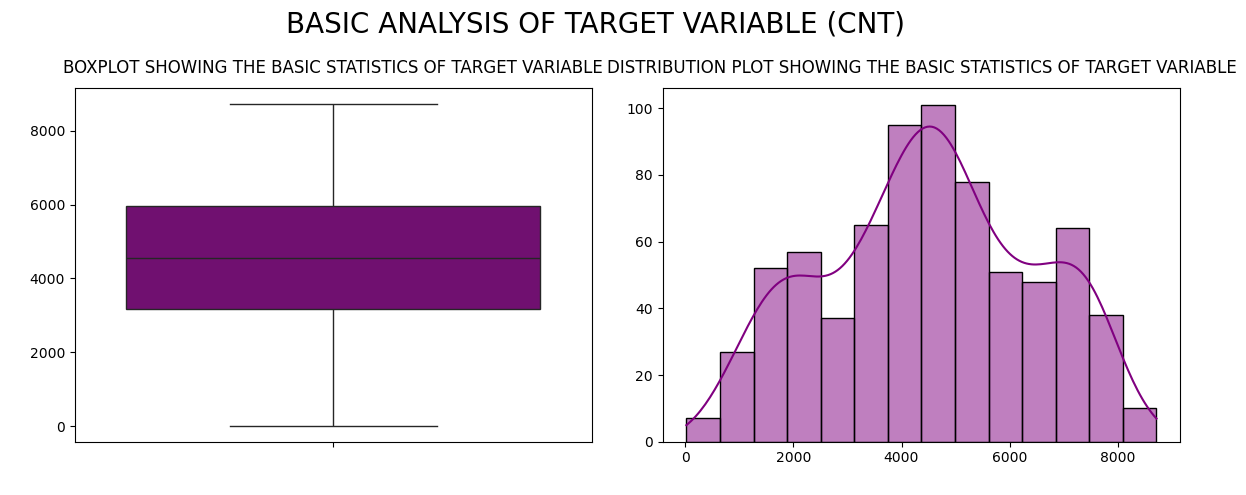

In [43]:
# Create subplot grid
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Create main title
fig.suptitle('Basic Analysis of Target Variable (cnt)'.upper(), fontsize=20)

# Boxplot showing the basic statistics of target variable
sns.boxplot(y=df['cnt'], ax=ax[0], color='purple')
ax[0].set_title('Boxplot showing the basic statistics of target variable'.upper(), fontsize=12, fontweight=20, y=1.02)
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')

# Distribution plot showing the basic statistics of target variable
sns.histplot(x=df['cnt'], ax=ax[1], color='purple', kde=True)
ax[1].set_title('Distribution plot showing the basic statistics of target variable'.upper(), fontsize=12, fontweight=20, y=1.02)
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')

plt.tight_layout()
plt.show()

In [44]:
# Create a list of continuous variables for analysis
cont_var = [i for i in df.select_dtypes(exclude='object').columns if df[i].nunique() > 2 and i != 'cnt']

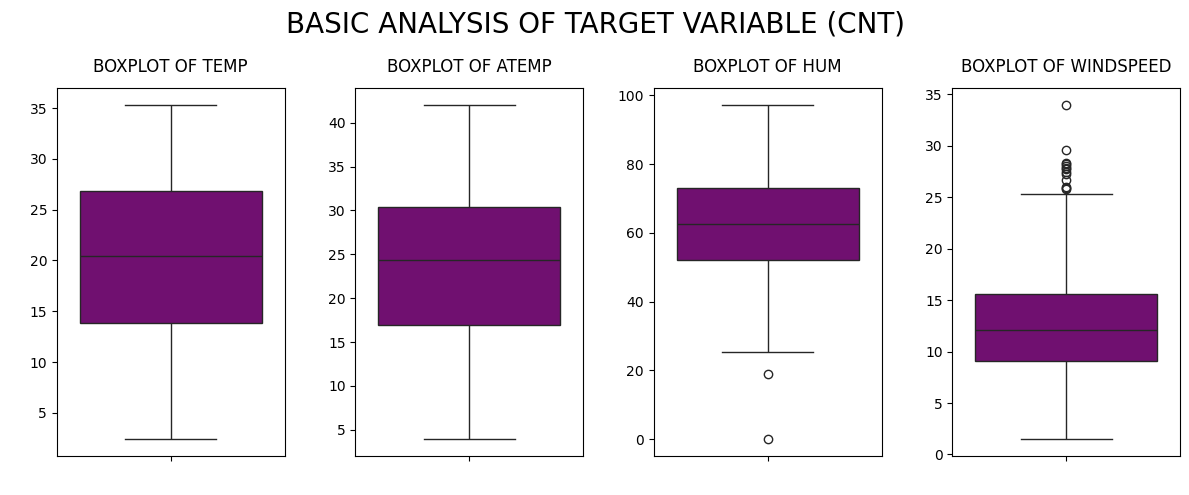

In [45]:
# Create subplot grid
fig, ax = plt.subplots(nrows=1, ncols=len(cont_var), figsize=(12, 5))

# Create main title
fig.suptitle('Basic Analysis of Target Variable (cnt)'.upper(), fontsize=20)

# Iterate over each continuous variable
for i in range(len(cont_var)):
    # Boxplot showing the basic statistics of target variable
    sns.boxplot(y=df[cont_var[i]], ax=ax[i], color='purple')
    ax[i].set_title('Boxplot of {}'.format(cont_var[i]).upper(), fontsize=12, fontweight=20, y=1.02)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')

plt.tight_layout()
plt.show()

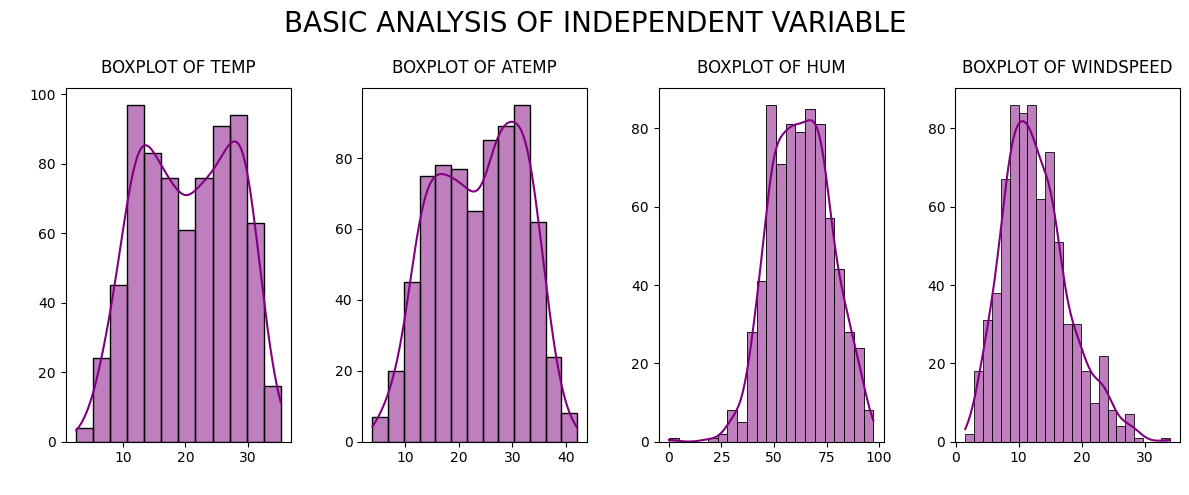

In [46]:
# Create subplot grid
fig, ax = plt.subplots(nrows=1, ncols=len(cont_var), figsize=(12, 5))

# Create main title
fig.suptitle('Basic Analysis of independent Variable'.upper(), fontsize=20)

# Iterate over each continuous variable
for i in range(len(cont_var)):
    # Boxplot showing the basic statistics of target variable
    sns.histplot(x=df[cont_var[i]], ax=ax[i], color='purple', kde=True)
    ax[i].set_title('Boxplot of {}'.format(cont_var[i]).upper(), fontsize=12, fontweight=20, y=1.02)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')

plt.tight_layout()
plt.show()

In [47]:
# Create a list of categotical independent variables for analysis
cont_var = [i for i in df.select_dtypes(include='object').columns]
cont_var.extend([ i for i in df.columns if df[i].nunique() == 2])

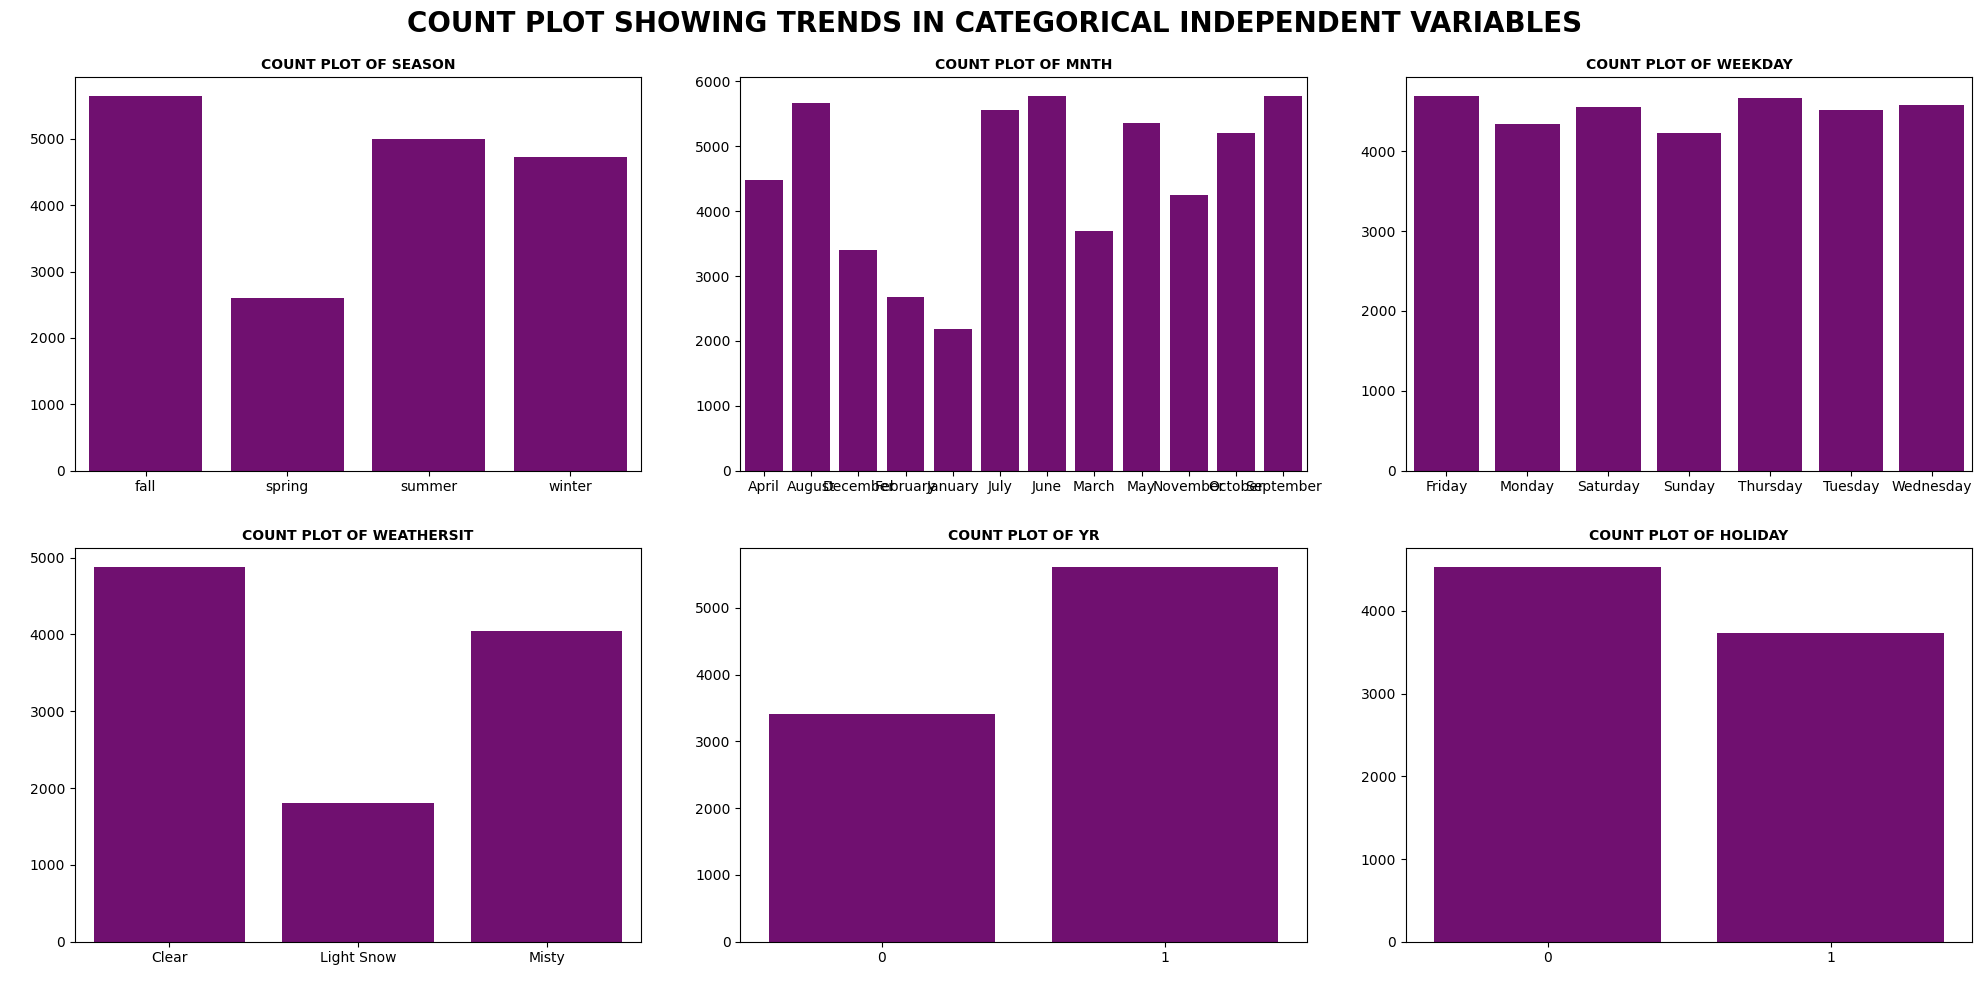

In [48]:
# Create subplot grid
fig, ax = plt.subplots(nrows=2, ncols=int(len(cont_var)/2), figsize=(20, 10))

# Create main title
fig.suptitle('Count Plot showing trends in categorical independent variables'.upper(), fontsize=20, fontweight='bold', y=0.99)

k = 0
# Iterate over each continuous variable
for i in range(2):
    for j in range(int(len(cont_var)/2)):
        # Count plot showing the trends in categorical independent variables
        sns.barplot(y = df.groupby(by = cont_var[k]).mean()['cnt'],
                      x = df.groupby(by = cont_var[k]).mean().index, ax=ax[i,j], color='purple')
        ax[i,j].set_title('Count Plot of {}'.format(cont_var[k]).upper(), fontsize=10,fontweight='bold')
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
        k += 1

plt.tight_layout()
plt.show()
     

In [ ]:
# Bivariate Analysis 

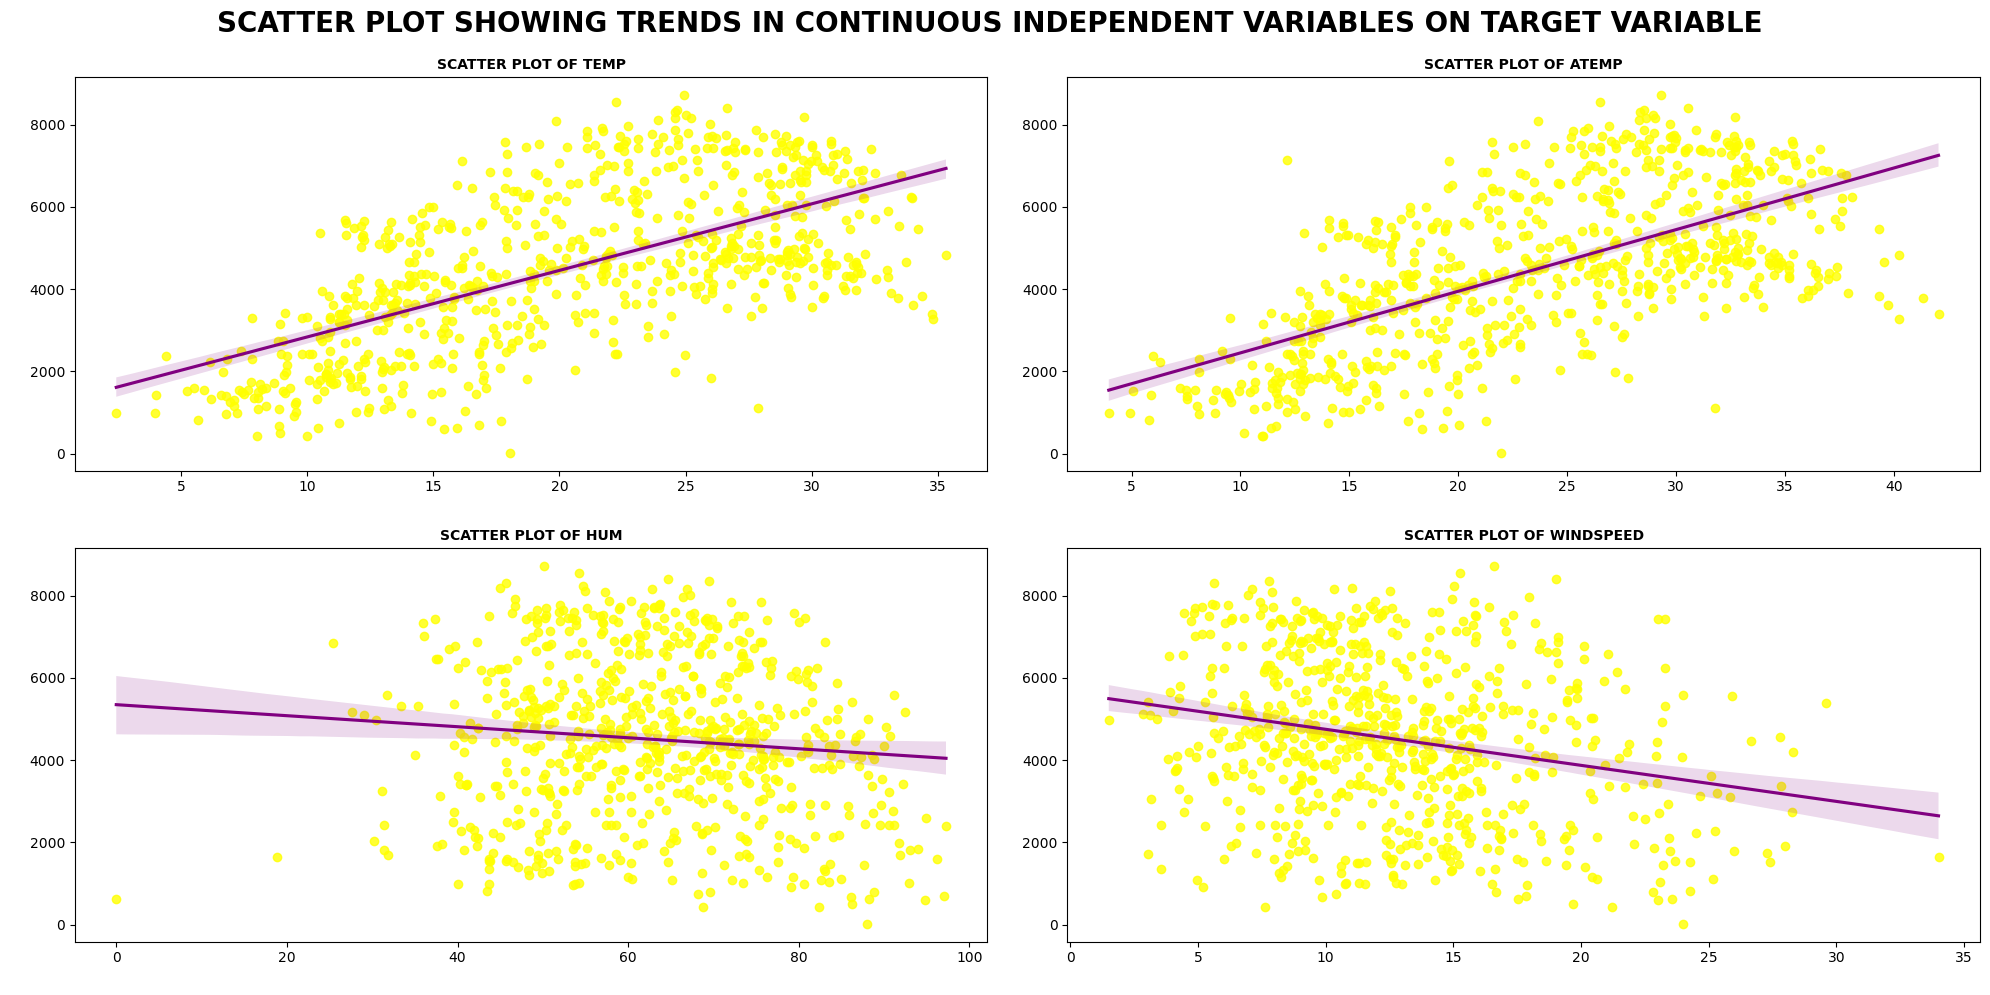

In [49]:
cont_var = [i for i in df.select_dtypes(exclude='object').columns if df[i].nunique() > 2 and i != 'cnt']


# Create subplot grid
fig, ax = plt.subplots(nrows=2, ncols=int(len(cont_var)/2), figsize=(20, 10))

# Create main title
fig.suptitle('Scatter Plot showing trends in Continuous independent variables on Target Variable '.upper(), fontsize=20, fontweight='bold', y=0.99)

k = 0
# Iterate over each continuous variable
for i in range(2):
    for j in range(int(len(cont_var)/2)):
        # Scatter plot showing the trends in continuous independent variables
        sns.regplot(x=df[cont_var[k]], y=df['cnt'], ax=ax[i,j], scatter_kws={'color':'yellow'}, line_kws={'color':'purple'})
        ax[i,j].set_title('Scatter Plot of {}'.format(cont_var[k]).upper(), fontsize=10, fontweight='bold')
        ax[i,j].set_ylabel(' ')
        ax[i,j].set_xlabel(' ')
        k += 1

plt.tight_layout()
plt.show()

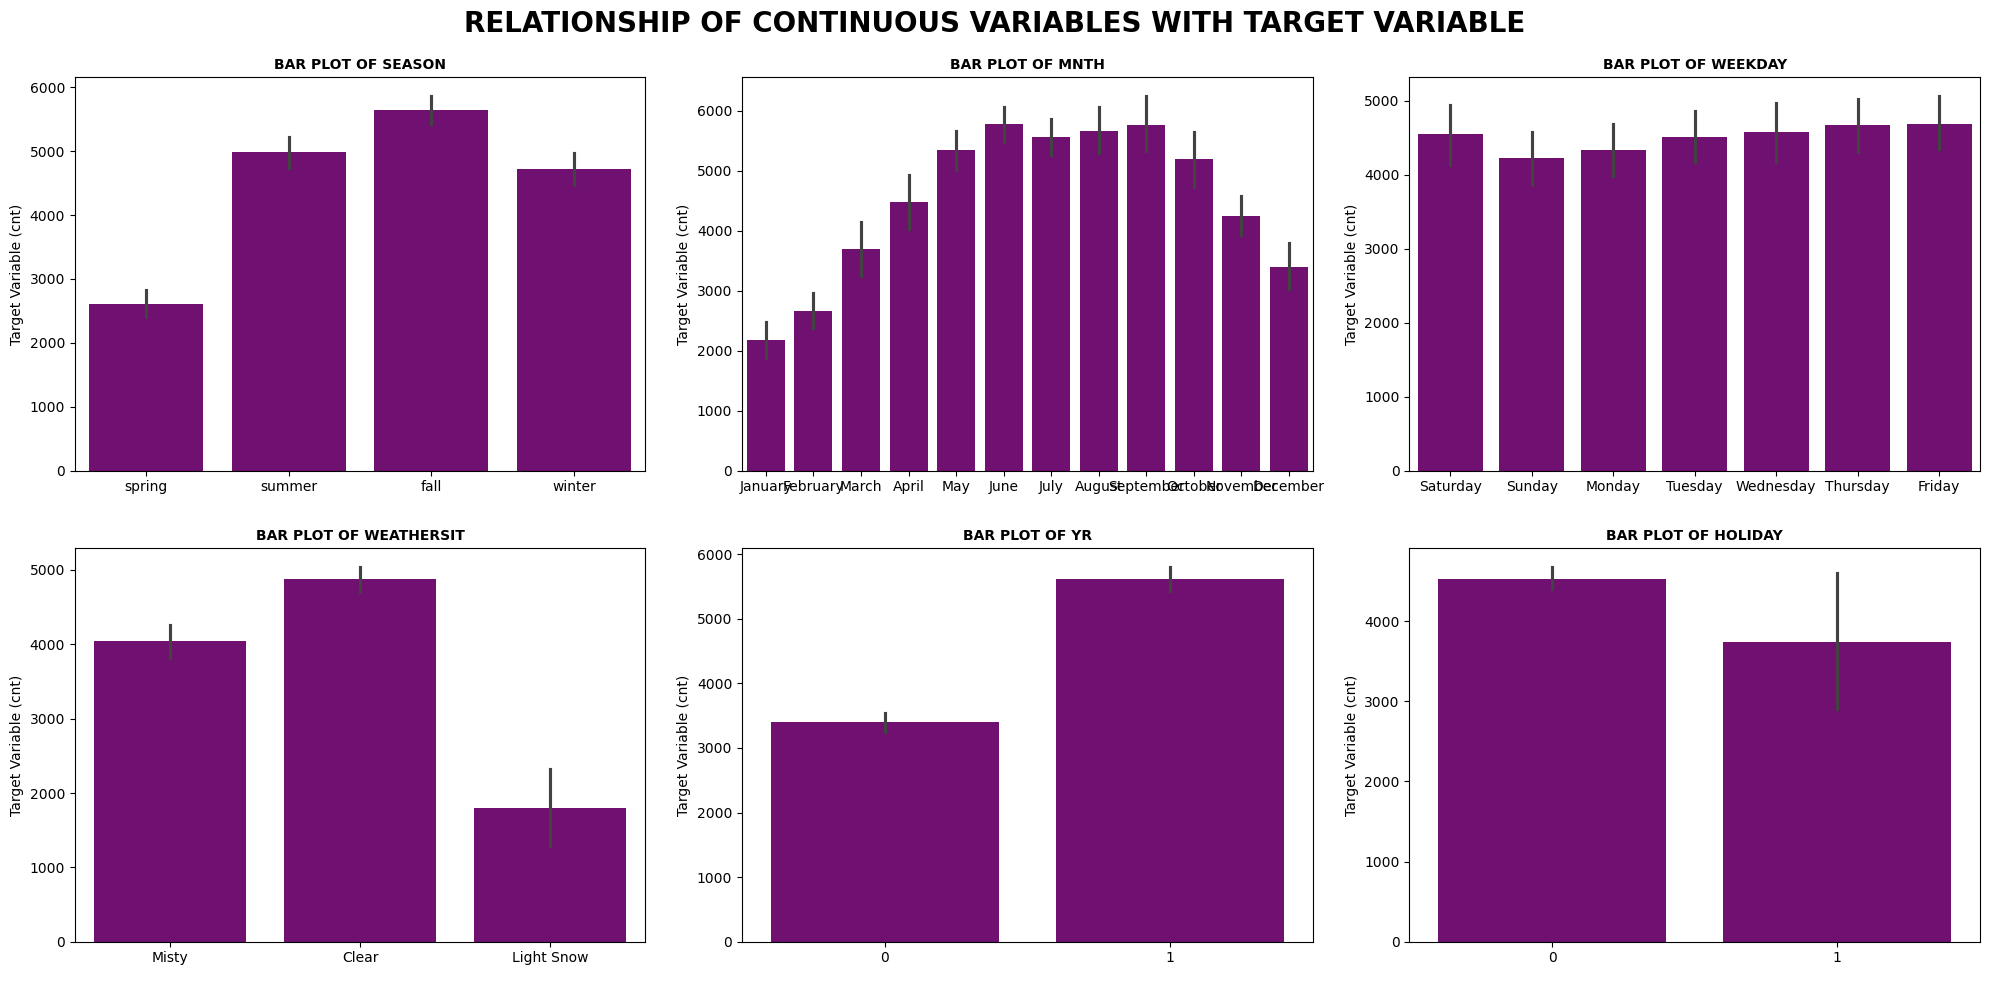

In [50]:
# Create a list of categotical independent variables for analysis
cont_var = [i for i in df.select_dtypes(include='object').columns]
cont_var.extend([ i for i in df.columns if df[i].nunique() == 2])
# Create subplot grid
fig, ax = plt.subplots(nrows=2, ncols=int(len(cont_var)/2), figsize=(20, 10))

# Create main title
fig.suptitle('Relationship of Continuous Variables with Target Variable'.upper(), fontsize=20, fontweight='bold', y=0.99)

k = 0
# Iterate over each continuous variable
for i in range(2):
    for j in range(int(len(cont_var)/2)):
        # Bar plot showing the relationship of continuous variables with the target variable
        sns.barplot(x=df[cont_var[k]], y=df['cnt'], ax=ax[i,j], color='purple')
        ax[i,j].set_title('Bar Plot of {}'.format(cont_var[k]).upper(), fontsize=10, fontweight='bold')
        ax[i,j].set_ylabel('Target Variable (cnt)')
        ax[i,j].set_xlabel(' ')
        k += 1

plt.tight_layout()
plt.show()

In [51]:
# Create a list of categotical independent variables for analysis
cont_var = [i for i in df.select_dtypes(include='object').columns]
cont_var.extend([ i for i in df.columns if df[i].nunique() == 2])

# Create main title
fig.suptitle('Relationship of Continuous Variables with Target Variable'.upper(), fontsize=20, fontweight='bold', y=0.99)

# Bar plot showing the relationship of continuous variables with the target variable
sns.barplot(x=df[cont_var[k]], y=df['cnt'], ax=ax[i,j], color='purple')
ax[i,j].set_title('Bar Plot of {}'.format(cont_var[k]).upper(), fontsize=10, fontweight='bold')
ax[i,j].set_ylabel('Target Variable (cnt)')
ax[i,j].set_xlabel(' ')


plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

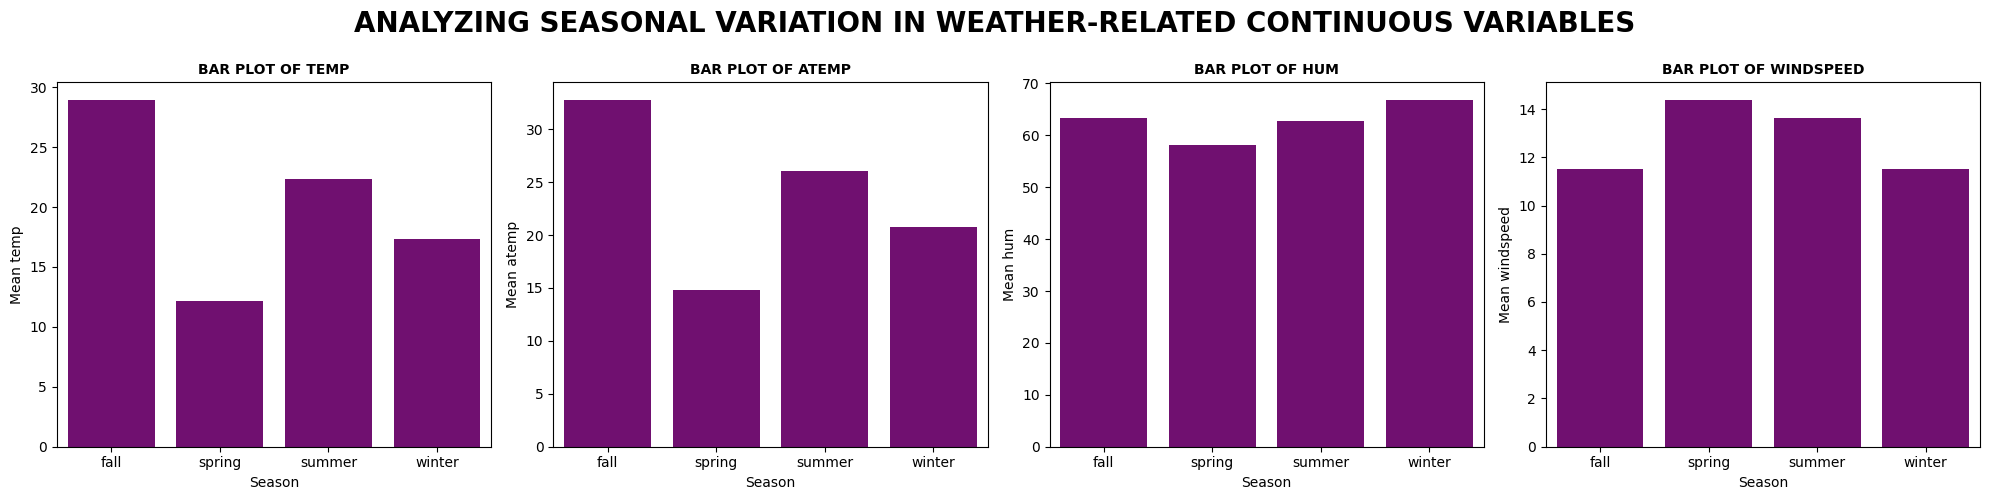

In [52]:
wether_var = ['temp','atemp','hum','windspeed']
# Create subplot grid
fig, ax = plt.subplots(nrows=1, ncols=len(wether_var), figsize=(20, 5))

# Create main title
fig.suptitle('Analyzing seasonal variation in weather-related continuous variables'.upper(), fontsize=20, fontweight='bold', y=0.99)

# Iterate over each continuous variable
for i in range(len(wether_var)):
    # Bar plot showing the relationship of continuous variables with the target variable
    sns.barplot(x=df.groupby(by='season').mean().index,
                y=df.groupby(by='season').mean()[wether_var[i]],
                ax=ax[i], color='purple')
    ax[i].set_title('Bar Plot of {}'.format(wether_var[i]).upper(), fontsize=10, fontweight='bold')
    ax[i].set_ylabel('Mean {}'.format(wether_var[i]))
    ax[i].set_xlabel('Season')

plt.tight_layout()
plt.show()

In [53]:

df.groupby(by=['season','mnth']).mean()

yr   holiday  workingday       temp      atemp        hum  \
season mnth                                                                    
fall   August     0.5  0.000000    0.741935  29.051844  32.573740  63.773010   
       July       0.5  0.032258    0.661290  30.974287  35.204693  59.787632   
       June       0.5  0.000000    0.750000  29.815540  33.567428  54.406250   
       September  0.5  0.045455    0.659091  25.597755  29.359852  71.831316   
spring December   0.5  0.090909    0.590909  12.215995  14.729875  63.842477   
       February   0.5  0.035714    0.678571  12.235249  14.943046  56.322686   
       January    0.5  0.048387    0.645161   9.694201  11.989795  58.582827   
       March      0.5  0.000000    0.700000  16.012501  19.135314  56.983105   
summer April      0.5  0.033333    0.666667  19.269952  22.854045  58.806312   
       June       0.5  0.000000    0.700000  27.164208  31.084715  59.167702   
       March      0.5  0.000000    0.772727  16.011340  19.029268  62.237318   
       May        0.5  0.032258    0.693548  24.386735  28.283100  68.895831   
winter December   0.5  0.000000    0.700000  13.873371  17.175946  68.122917   
       November   0.5  0.066667    0.666667  15.138010  18.367938  62.487648   
       October    0.5  0.032258    0.677419  19.885500  23.598660  69.376087   
       September  0.5  0.000000    0.687500  24.390739  27.878984  70.481769   

                  windspeed          cnt  
season mnth                               
fall   August     11.585516  5664.419355  
       July       11.125941  5563.677419  
       June       12.904325  5769.400000  
       September  11.398001  5672.704545  
spring December   14.304489  1954.454545  
       February   14.494573  2669.964286  
       January    13.822285  2176.338710  
       March      15.157842  3551.625000  
summer April      15.710310  4484.900000  
       June       12.182538  5773.850000  
       March      14.489990  3947.954545  
       May        12.260258  5349.774194  
winter December   10.473367  4200.950000  
       November   12.314695  4247.183333  
       October    11.738767  5199.225806  
       September  10.349210  6024.500000

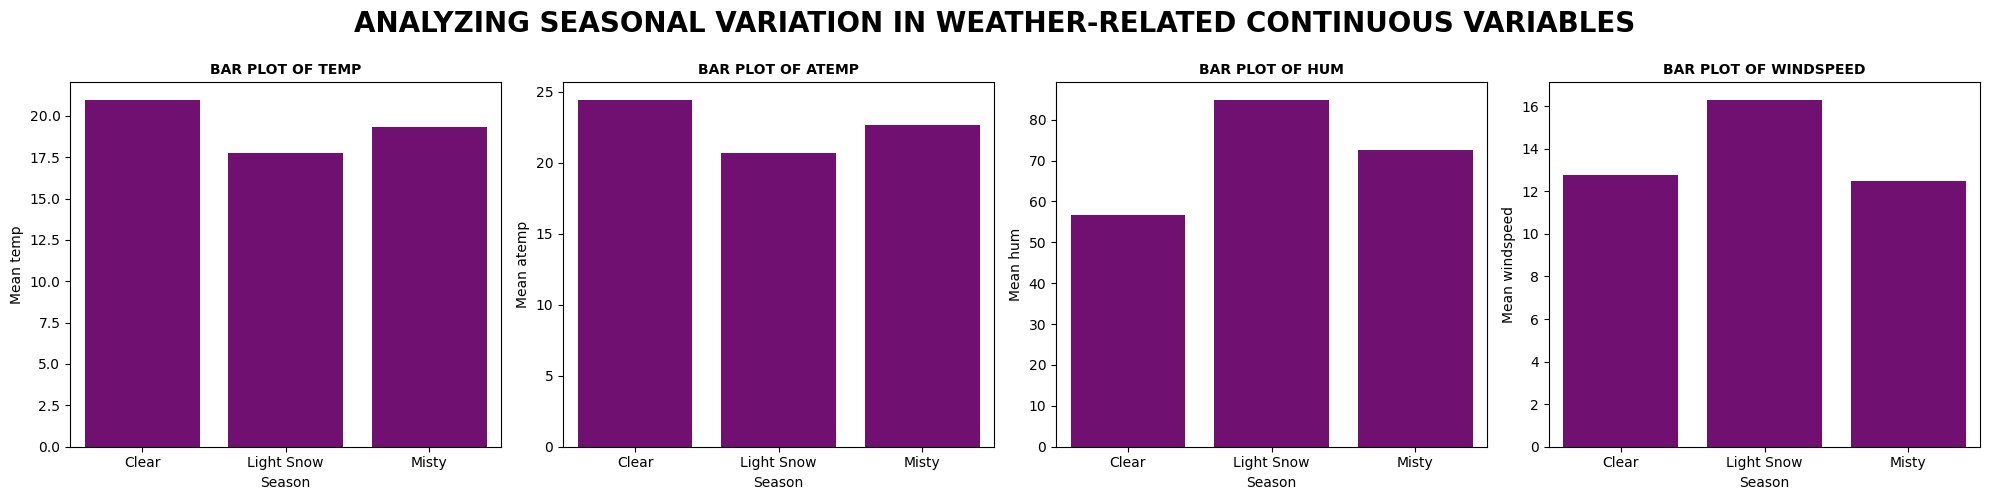

In [54]:
weather_var = ['temp','atemp','hum','windspeed']
# Create subplot grid
fig, ax = plt.subplots(nrows=1, ncols=len(weather_var), figsize=(20, 5))

# Create main title
fig.suptitle('Analyzing seasonal variation in weather-related continuous variables'.upper(), fontsize=20, fontweight='bold', y=0.99)

# Iterate over each continuous variable
for i in range(len(weather_var)):
    # Bar plot showing the relationship of continuous variables with the target variable
    sns.barplot(x=df.groupby(by='weathersit').mean().index,
                y=df.groupby(by='weathersit').mean()[weather_var[i]],
                ax=ax[i], color='purple')
    ax[i].set_title('Bar Plot of {}'.format(weather_var[i]).upper(), fontsize=10, fontweight='bold')
    ax[i].set_ylabel('Mean {}'.format(weather_var[i]))
    ax[i].set_xlabel('Season')

plt.tight_layout()
plt.show()

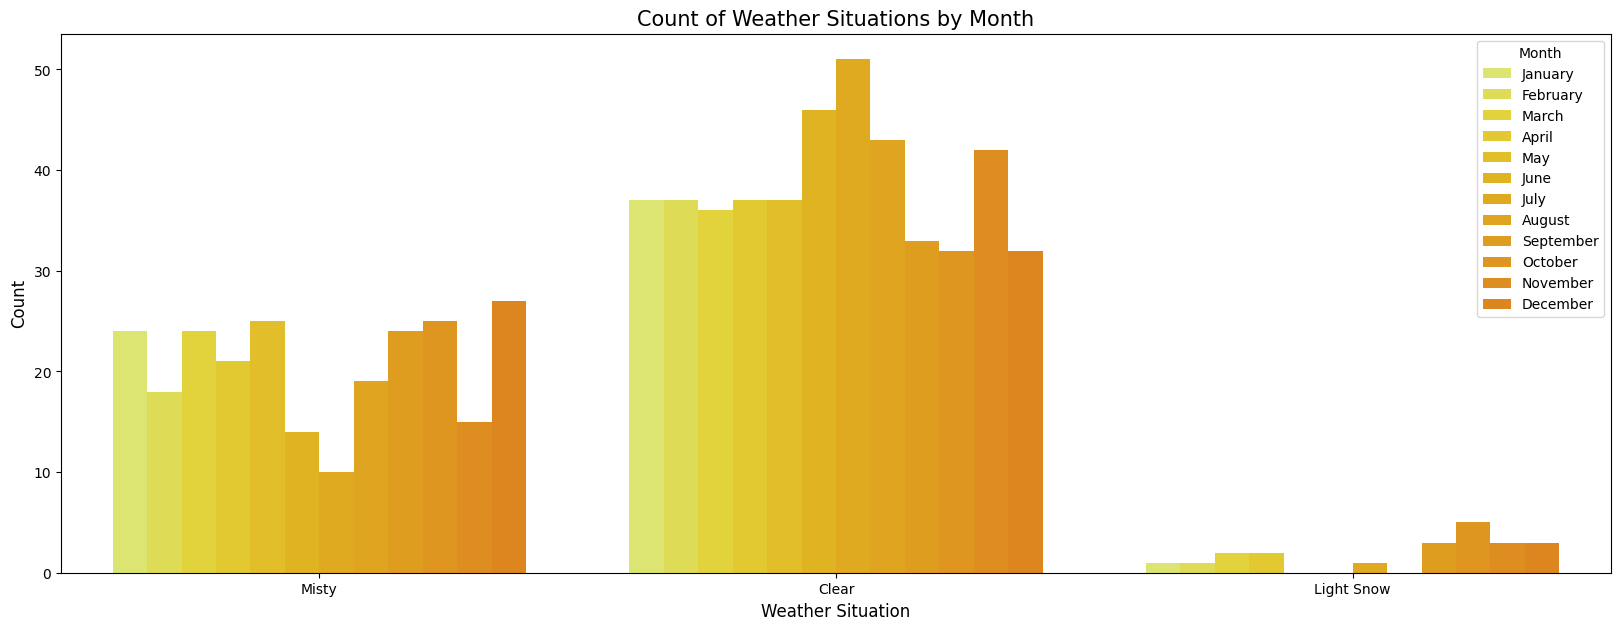

In [55]:
# Set the figure size
plt.figure(figsize=(20, 7))

# Create countplot
sns.countplot(x='weathersit', data=df, hue='mnth', palette='Wistia')

# Add title and labels
plt.title('Count of Weather Situations by Month', fontsize=15)
plt.xlabel('Weather Situation', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend
plt.legend(title='Month')

# Display the plot
plt.show()

In [ ]:
# Section 5 : Feature Transformation

In [58]:
boombike = df.copy()

In [59]:
dummy_list = [i for i in boombike.select_dtypes(include='object').columns]

In [60]:
for i in dummy_list:
    dummy = pd.get_dummies(data=boombike[i], drop_first=True)
    boombike = pd.concat([boombike, dummy], axis=1).drop(labels=i, axis=1)

In [61]:
boombike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Snow,Misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


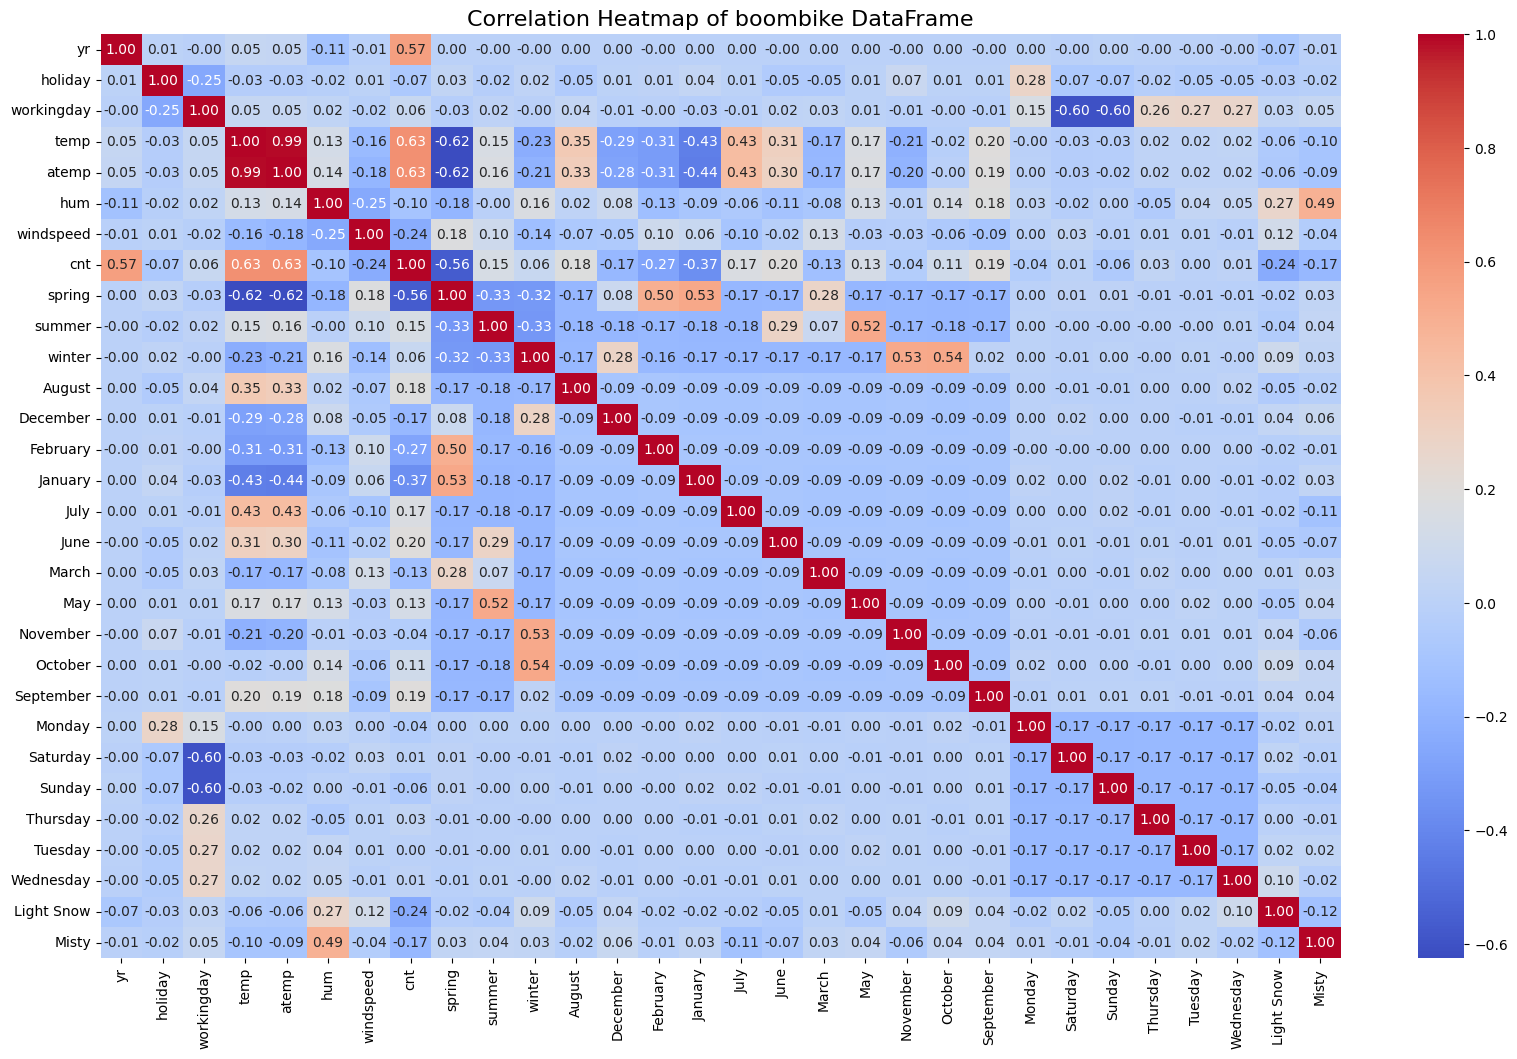

In [62]:
# Calculate the correlation matrix

# Create the heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(boombike.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Add title and show the plot
plt.title('Correlation Heatmap of boombike DataFrame', fontsize=16)
plt.show()

In [ ]:
# Train and Test Split 

In [63]:
# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train_scalar, X_test_scaler = train_test_split(boombike, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Shape of X_train:", X_train_scalar.shape)
print("Shape of X_test:", X_test_scaler.shape)

Shape of X_train: (584, 30)
Shape of X_test: (146, 30)


In [ ]:
# Feature scaling

In [64]:
# Create a scaler object
wether_var = [i for i in boombike.columns if boombike[i].nunique() > 2]
scalar = MinMaxScaler()
# Fit the MinMaxScaler to the training data and transform it
scalar.fit(X_train_scalar[wether_var])
# Transform the test data using the scaler fitted on the training data
X_train_scalar[wether_var] = scalar.transform(X_train_scalar[wether_var])

X_test_scaler[wether_var] = scalar.transform(X_test_scaler[wether_var])

In [65]:
y_train  = X_train_scalar.pop('cnt')
X_train = X_train_scalar

In [ ]:
# Model Development 

In [66]:
# Create a Linear Regression model
lm = LinearRegression()

# Fit the model to the training data
lm.fit(X_train, y_train)

# Create Recursive Feature Elimination (RFE) object with 15 features
rfe = RFE(lm, n_features_to_select=15)

# Fit RFE to the training data
rfe = rfe.fit(X_train, y_train)

In [67]:
# Create a DataFrame with feature names, support, and ranking and sort by ranking
feature_selection_result = pd.DataFrame(list(zip(X_train.columns, rfe.support_, rfe.ranking_)),
                                        columns=['Feature', 'Support', 'Ranking']).sort_values('Ranking')

In [68]:
feature_selection_result.head(15)

,Feature,Support,Ranking
0,yr,True,1
23,Sunday,True,1
22,Saturday,True,1
20,September,True,1
18,November,True,1
27,Light Snow,True,1
11,December,True,1
9,winter,True,1
14,July,True,1
7,spring,True,1


In [69]:
# selecting the selected variable via RFE in col list
col = X_train.columns[rfe.support_]

# checking which columns has been rejected
X_train.columns[~rfe.support_]

Index(['temp', 'summer', 'August', 'February', 'January', 'June', 'March',
       'May', 'October', 'Monday', 'Thursday', 'Tuesday', 'Wednesday',
       'Misty'],
      dtype='object')

In [70]:
#Calculate the Variance Inflation Factor (VIF) for each feature in the DataFrame.
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [71]:
def regmodel_ols(y_dataframe, x_dataframe):
    # Add a constant column to the independent variable DataFrame
    X_dataframe = sm.add_constant(x_dataframe)

    # Fit the OLS regression model
    lm = sm.OLS(y_dataframe, X_dataframe).fit()

    # Print the summary of the regression model
    print(lm.summary())

In [72]:
X_train_1 = X_train[col]

In [73]:
#Building Regression Model
regmodel_ols(y_train, X_train_1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     199.7
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          6.79e-209
Time:                        23:44:56   Log-Likelihood:                 562.10
No. Observations:                 584   AIC:                            -1094.
Df Residuals:                     569   BIC:                            -1029.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3187      0.026     12.416      0.0

In [ ]:
Observation :
The above linear regression model demonstrates an R-squared value of 0.827, suggesting that approximately 82.7% of the variance in the dependent variable is explained by the independent variables included in the model.

The adjusted R-squared value, at 0.823, provides a more precise assessment of the model's goodness of fit, considering the number of predictors present in the model.

In [74]:
#Inspecting VIF Value:
calculateVIF(X_train_1)

,Features,VIF
2,workingday,45.55
13,Sunday,10.94
12,Saturday,10.27
3,atemp,3.38
1,holiday,3.17
6,spring,2.80
7,winter,2.18
10,November,1.68
9,July,1.36
8,December,1.30


In [75]:
#drop 'atemp' columns
X_train_2 = X_train_1.drop(labels='atemp',axis=1)
regmodel_ols(y_train, X_train_2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          3.83e-173
Time:                        23:45:48   Log-Likelihood:                 474.58
No. Observations:                 584   AIC:                            -921.2
Df Residuals:                     570   BIC:                            -860.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5401      0.024     22.918      0.0

In [ ]:
Observation :
The above linear regression model demonstrates an R-squared value of 0.827, suggesting that approximately 82.6% of the variance in the dependent variable is explained by the independent variables included in the model.

The adjusted R-squared value, at 0.822, provides a more precise assessment of the model's goodness of fit, considering the number of predictors present in the model.

In [76]:
#Inspecting VIF Value:
calculateVIF(X_train_2)

,Features,VIF
2,workingday,27.63
12,Sunday,7.12
11,Saturday,6.66
1,holiday,2.34
6,winter,1.94
9,November,1.58
5,spring,1.31
3,hum,1.25
7,December,1.23
8,July,1.16


In [77]:
#drop 'workingday' columns
X_train_3 = X_train_2.drop(labels='workingday',axis=1)
regmodel_ols(y_train, X_train_3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     148.3
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          3.83e-173
Time:                        23:46:24   Log-Likelihood:                 474.58
No. Observations:                 584   AIC:                            -921.2
Df Residuals:                     570   BIC:                            -860.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7048      0.029     24.458      0.0

In [ ]:
Observation :
The above linear regression model demonstrates an R-squared value of 0.827, suggesting that approximately 82.6% of the variance in the dependent variable is explained by the independent variables included in the model.

The adjusted R-squared value, at 0.822, provides a more precise assessment of the model's goodness of fit, considering the number of predictors present in the model.

In [79]:
#Inspecting VIF Value:
calculateVIF(X_train_3)

,Features,VIF
2,hum,6.16
3,windspeed,4.55
5,winter,2.59
0,yr,1.96
8,November,1.73
4,spring,1.61
6,December,1.33
11,Sunday,1.23
7,July,1.21
9,September,1.21


In [80]:
#drop 'hum' columns
X_train_4 = X_train_3.drop(labels='hum',axis=1)
regmodel_ols(y_train, X_train_4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     148.0
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          2.15e-166
Time:                        23:47:04   Log-Likelihood:                 455.96
No. Observations:                 584   AIC:                            -885.9
Df Residuals:                     571   BIC:                            -829.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5504      0.014     38.223      0.0

In [ ]:
Observation :
The above linear regression model demonstrates an R-squared value of 0.827, suggesting that approximately 80.5% of the variance in the dependent variable is explained by the independent variables included in the model.

The adjusted R-squared value, at 0.801, provides a more precise assessment of the model's goodness of fit, considering the number of predictors present in the model.

In [81]:
#Inspecting VIF Value:
calculateVIF(X_train_4)

,Features,VIF
2,windspeed,2.66
4,winter,2.34
0,yr,1.84
7,November,1.72
3,spring,1.56
5,December,1.32
10,Sunday,1.22
9,Saturday,1.20
6,July,1.15
8,September,1.12


In [82]:
#drop 'Saturday' columns
X_train_5 = X_train_4.drop(labels='Saturday',axis=1)
regmodel_ols(y_train, X_train_5)
     

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     161.7
Date:                Mon, 11 Mar 2024   Prob (F-statistic):          1.80e-167
Time:                        23:47:35   Log-Likelihood:                 455.87
No. Observations:                 584   AIC:                            -887.7
Df Residuals:                     572   BIC:                            -835.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5512      0.014     38.664      0.0

In [ ]:
Observation :
The above linear regression model demonstrates an R-squared value of 0.827, suggesting that approximately 80.5% of the variance in the dependent variable is explained by the independent variables included in the model.

The adjusted R-squared value, at 0.801, provides a more precise assessment of the model's goodness of fit, considering the number of predictors present in the model.

In [83]:
#Inspecting VIF Value:
calculateVIF(X_train_5)

,Features,VIF
2,windspeed,2.56
4,winter,2.34
0,yr,1.83
7,November,1.72
3,spring,1.56
5,December,1.32
9,Sunday,1.19
6,July,1.14
8,September,1.12
10,Light Snow,1.08


In [ ]:
# Residual Analysis 

In [84]:
lm = sm.OLS(y_train, X_train_5).fit()
y_train_pred = lm.predict(X_train_5)
residuals = y_train - y_train_pred

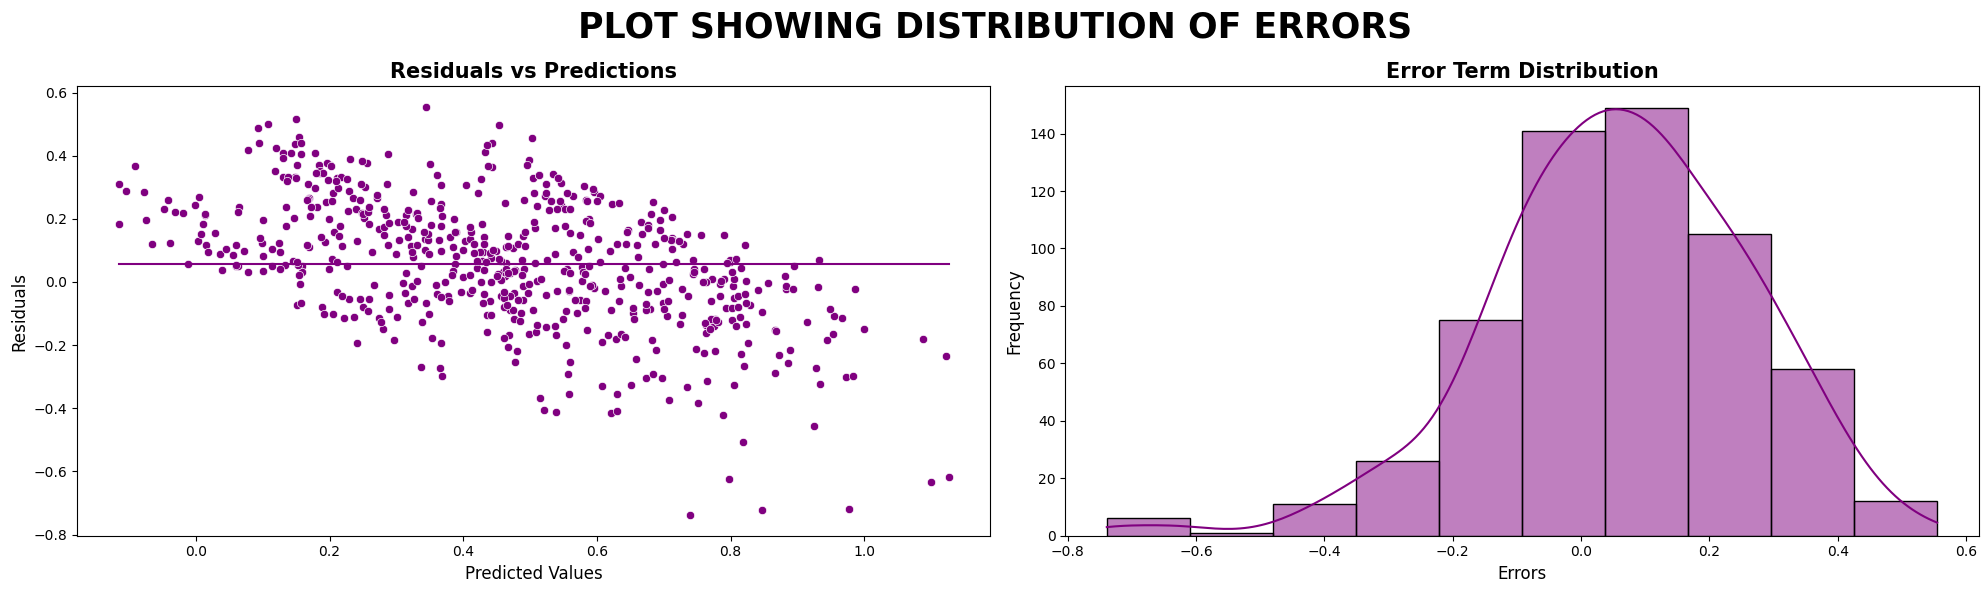

In [85]:
# Create subplot grid
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Create main title
fig.suptitle('Plot showing distribution of errors'.upper(), fontsize=25, fontweight='bold')

# Scatter plot of residuals vs predictions
sns.scatterplot(x=y_train_pred, y=residuals, color='purple', ax=ax[0])
sns.lineplot(x=y_train_pred, y=residuals.mean(), color='purple', ax=ax[0])

ax[0].set_title('Residuals vs Predictions', fontsize=15, fontweight='bold')
ax[0].set_xlabel('Predicted Values', fontsize=12)
ax[0].set_ylabel('Residuals', fontsize=12)

# Distribution plot of error terms
sns.histplot(residuals, color='purple', ax=ax[1], bins=10, kde=True)
ax[1].set_title('Error Term Distribution', fontsize=15, fontweight='bold')
ax[1].set_xlabel('Errors', fontsize=12)
ax[1].set_ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

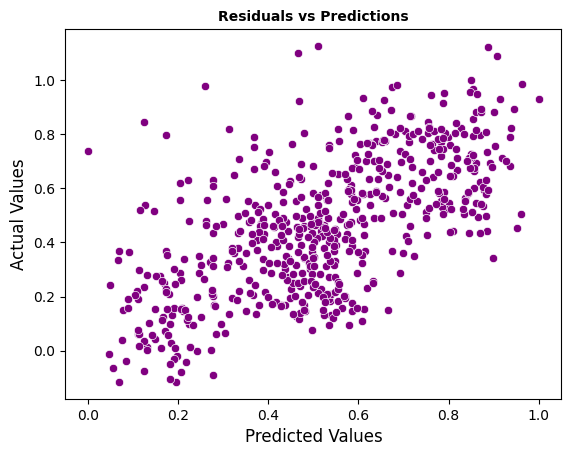

In [86]:
# Scatter plot of residuals vs predictions
sns.scatterplot(x=y_train, y=y_train_pred, color='purple')

# Add title and labels
plt.title('Residuals vs Predictions', fontsize=10, fontweight='bold')
plt.ylabel('Actual Values', fontsize=12)
plt.xlabel('Predicted Values', fontsize=12)
plt.show()

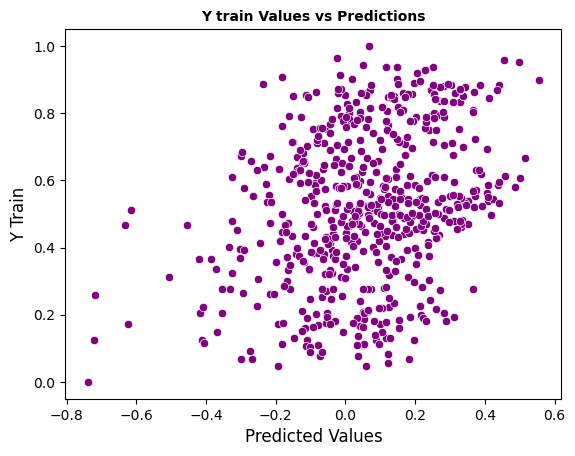

In [87]:
# Scatter plot of residuals vs predictions
sns.scatterplot(x=residuals, y=y_train, color='purple')

# Add title and labels
plt.title('Y train Values vs Predictions', fontsize=10, fontweight='bold')
plt.ylabel('Y Train', fontsize=12)
plt.xlabel('Predicted Values', fontsize=12)
plt.show()

In [ ]:
# Making Predictions 

In [88]:
y_test = X_test_scaler.pop('cnt')
X_test = X_test_scaler

In [89]:
#creating X_test datafream by dropping variables from X_test
X_test_new = X_test[X_train_5.columns]

In [90]:
#Making predications
y_test_pred = lm.predict(X_test_new)

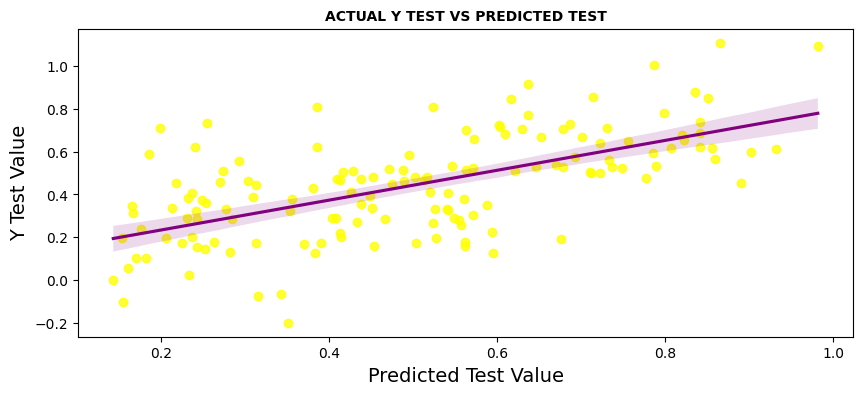

In [91]:
# Create a figure with a specified size
fig = plt.figure(figsize=(10, 4))

# Create a regression plot comparing actual y_test values with predicted y_test_pred values
sns.regplot(x=y_test, y=y_test_pred, scatter_kws={'color': 'yellow'}, line_kws={'color': 'purple'})

# Set the title of the plot
plt.title('Actual y test vs predicted test'.upper(), fontsize=10, fontweight='bold')

# Set the ylabel
plt.ylabel('Y Test Value', fontsize=14)

# Set the xlabel
plt.xlabel('Predicted Test Value', fontsize=14)

# Show the plot
plt.show()

In [ ]:
Observation:
Y test and y test pred values show a strong visual resemblance, indicating that our predictions are evaluated as a healthy fit even in the presence of outliers.

In [92]:
print('R2 score of test data prediction:', round(r2_score(y_pred=y_test_pred, y_true=y_test), 5))
print('R2 score of train data prediction:', round(r2_score(y_pred=y_train_pred, y_true=y_train), 5))
print('Absolute difference between R2 Scores:', abs(round(r2_score(y_pred=y_test_pred, y_true=y_test) - r2_score(y_pred=y_train_pred, y_true=y_train), 5)))

     

R2 score of test data prediction: 0.05919
R2 score of train data prediction: 0.12078
Absolute difference between R2 Scores: 0.06159


In [ ]:
Observation:
The R2 score of the test data prediction is 0.77852, indicating that approximately 77.85% of the variance in the target variable is explained by the model.
The R2 score of the train data prediction is 0.76618, suggesting that approximately 76.62% of the variance in the target variable is explained by the model when trained on the training data.
The absolute difference between the R2 scores of the test and train data predictions is 0.01234, indicating a slight variance between the model performance on the test and train datasets.

In [93]:
# Retrieve the constant term from the fitted OLS model
const = 0.2790

# Convert the model parameters to a Series
parameter_series = pd.Series(lm.params)

# Print the parameter Series
print(parameter_series)

# Extract the coefficients of the independent variables
coefficients = parameter_series.drop(index='const', errors='ignore')

# Get the names of the independent variables
independent_variables = coefficients.index

# Initialize the equation string with the constant term
equation = f'y = {const:.4f}'

# Add terms for each independent variable
for variable, coef in zip(independent_variables, coefficients):
    equation += f' + ({coef:.4f}) * {variable}'

print(equation)

yr            0.360174
holiday      -0.048276
windspeed     0.610167
spring       -0.150886
winter        0.195513
December     -0.087640
July          0.244825
November     -0.118813
September     0.228204
Sunday       -0.002062
Light Snow   -0.328924
dtype: float64
y = 0.2790 + (0.3602) * yr + (-0.0483) * holiday + (0.6102) * windspeed + (-0.1509) * spring + (0.1955) * winter + (-0.0876) * December + (0.2448) * July + (-0.1188) * November + (0.2282) * September + (-0.0021) * Sunday + (-0.3289) * Light Snow


In [ ]:
Observation:
Positive Impact on Bike Count:

The features yr (Year), temp (Temperature), winter, and September have a
Negative Impact on Bike Count:

Conversely, holiday, spring, December, November, Sunday, and Light Snow have a negative impact on bike count.
Neutral Impact on Bike Count:

The windspeed feature does not significantly impact bike count.